In [1]:
import pandas as pd
import numpy as np
import pyreadstat

In [2]:
df, meta = pyreadstat.read_dta('C:\\Users\\royal\\Downloads\\Poverty and Vulnerability Assessment Tool (PVAT) questionnaire dataset of Nepal 2011_12\\data\\Share pvatData-2011_2012.dta')

In [3]:
df

,qid,region,district,vdc,ward,age,sex,consent,relation,hh_martial,...,q64a,q64b,q64c,q64d,q64e,q64f,hh_size,hh_weight,strata,pop_weight
0,798,4,5,51,1,50,1,1,1,1,...,97,97,97,97,97,97,8,145.717647,4,1165.741211
1,4618,5,17,173,8,57,1,1,1,1,...,2,1,2,1,2,2,7,124.875000,4,874.125000
2,1704,5,6,62,12,21,2,1,6,1,...,97,97,97,97,97,97,4,99.054852,5,396.219421
3,5097,4,16,165,2,66,1,1,1,4,...,2,2,2,2,2,2,6,13.500000,3,81.000000
4,4868,4,16,161,5,45,2,1,1,1,...,2,2,2,2,2,2,5,7.204327,5,36.021633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,3147,2,9,94,9,28,1,1,3,1,...,97,97,97,97,97,97,11,332.348684,4,3655.835449
6138,7027,1,11,115,6,80,1,1,1,4,...,2,2,2,2,2,2,7,224.718750,4,1573.031250
6139,6200,2,13,133,7,65,2,1,1,1,...,2,2,2,2,2,2,12,293.203125,1,3518.437500
6140,6253,2,13,135,1,52,1,1,1,1,...,2,2,2,2,2,2,4,399.234375,3,1596.937500


In [4]:
df = df.assign(num_migrated = df["q2_34"])

In [5]:
df

,qid,region,district,vdc,ward,age,sex,consent,relation,hh_martial,...,q64b,q64c,q64d,q64e,q64f,hh_size,hh_weight,strata,pop_weight,num_migrated
0,798,4,5,51,1,50,1,1,1,1,...,97,97,97,97,97,8,145.717647,4,1165.741211,1.0
1,4618,5,17,173,8,57,1,1,1,1,...,1,2,1,2,2,7,124.875000,4,874.125000,0.0
2,1704,5,6,62,12,21,2,1,6,1,...,97,97,97,97,97,4,99.054852,5,396.219421,0.0
3,5097,4,16,165,2,66,1,1,1,4,...,2,2,2,2,2,6,13.500000,3,81.000000,0.0
4,4868,4,16,161,5,45,2,1,1,1,...,2,2,2,2,2,5,7.204327,5,36.021633,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,3147,2,9,94,9,28,1,1,3,1,...,97,97,97,97,97,11,332.348684,4,3655.835449,0.0
6138,7027,1,11,115,6,80,1,1,1,4,...,2,2,2,2,2,7,224.718750,4,1573.031250,2.0
6139,6200,2,13,133,7,65,2,1,1,1,...,2,2,2,2,2,12,293.203125,1,3518.437500,0.0
6140,6253,2,13,135,1,52,1,1,1,1,...,2,2,2,2,2,4,399.234375,3,1596.937500,1.0


In [6]:
df = df[df['num_migrated'] < df['hh_size']]

In [7]:
df.loc[:, "migration_ratio"] = df["num_migrated"] / df["hh_size"]

C:\Users\royal\AppData\Local\Temp\ipykernel_31624\2442608088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "migration_ratio"] = df["num_migrated"] / df["hh_size"]


In [8]:
df.loc[:, "help_received"] = np.where( (df["q43d"] == 1) | (df["q43e"] == 1) | (df["q43f"] == 1) | (df["q43g"] == 1) | (df["q43h"] == 1) | (df["q43i"] == 1) | (df["q43j"] == 1),  1,  0)

C:\Users\royal\AppData\Local\Temp\ipykernel_31624\1979240937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "help_received"] = np.where( (df["q43d"] == 1) | (df["q43e"] == 1) | (df["q43f"] == 1) | (df["q43g"] == 1) | (df["q43h"] == 1) | (df["q43i"] == 1) | (df["q43j"] == 1),  1,  0)


In [9]:
df

,qid,region,district,vdc,ward,age,sex,consent,relation,hh_martial,...,q64d,q64e,q64f,hh_size,hh_weight,strata,pop_weight,num_migrated,migration_ratio,help_received
0,798,4,5,51,1,50,1,1,1,1,...,97,97,97,8,145.717647,4,1165.741211,1.0,0.125000,0
1,4618,5,17,173,8,57,1,1,1,1,...,1,2,2,7,124.875000,4,874.125000,0.0,0.000000,0
2,1704,5,6,62,12,21,2,1,6,1,...,97,97,97,4,99.054852,5,396.219421,0.0,0.000000,0
3,5097,4,16,165,2,66,1,1,1,4,...,2,2,2,6,13.500000,3,81.000000,0.0,0.000000,0
4,4868,4,16,161,5,45,2,1,1,1,...,2,2,2,5,7.204327,5,36.021633,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,3147,2,9,94,9,28,1,1,3,1,...,97,97,97,11,332.348684,4,3655.835449,0.0,0.000000,0
6138,7027,1,11,115,6,80,1,1,1,4,...,2,2,2,7,224.718750,4,1573.031250,2.0,0.285714,0
6139,6200,2,13,133,7,65,2,1,1,1,...,2,2,2,12,293.203125,1,3518.437500,0.0,0.000000,1
6140,6253,2,13,135,1,52,1,1,1,1,...,2,2,2,4,399.234375,3,1596.937500,1.0,0.250000,0


In [10]:
import matplotlib.pyplot as plt

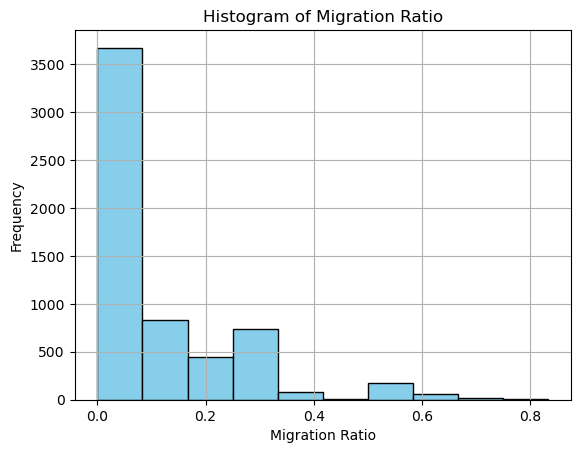

In [11]:
plt.hist(df['migration_ratio'], bins=10, color='skyblue', edgecolor='black')

plt.title('Histogram of Migration Ratio')
plt.xlabel('Migration Ratio')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [12]:
df

,qid,region,district,vdc,ward,age,sex,consent,relation,hh_martial,...,q64d,q64e,q64f,hh_size,hh_weight,strata,pop_weight,num_migrated,migration_ratio,help_received
0,798,4,5,51,1,50,1,1,1,1,...,97,97,97,8,145.717647,4,1165.741211,1.0,0.125000,0
1,4618,5,17,173,8,57,1,1,1,1,...,1,2,2,7,124.875000,4,874.125000,0.0,0.000000,0
2,1704,5,6,62,12,21,2,1,6,1,...,97,97,97,4,99.054852,5,396.219421,0.0,0.000000,0
3,5097,4,16,165,2,66,1,1,1,4,...,2,2,2,6,13.500000,3,81.000000,0.0,0.000000,0
4,4868,4,16,161,5,45,2,1,1,1,...,2,2,2,5,7.204327,5,36.021633,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,3147,2,9,94,9,28,1,1,3,1,...,97,97,97,11,332.348684,4,3655.835449,0.0,0.000000,0
6138,7027,1,11,115,6,80,1,1,1,4,...,2,2,2,7,224.718750,4,1573.031250,2.0,0.285714,0
6139,6200,2,13,133,7,65,2,1,1,1,...,2,2,2,12,293.203125,1,3518.437500,0.0,0.000000,1
6140,6253,2,13,135,1,52,1,1,1,1,...,2,2,2,4,399.234375,3,1596.937500,1.0,0.250000,0


In [13]:
df["married"] = df["hh_martial"].apply(lambda x: 0 if x > 1 else 1)

C:\Users\royal\AppData\Local\Temp\ipykernel_31624\51607478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["married"] = df["hh_martial"].apply(lambda x: 0 if x > 1 else 1)


In [14]:
df["married"]

0       1
1       1
2       1
3       0
4       1
       ..
6137    1
6138    0
6139    1
6140    1
6141    1
Name: married, Length: 6023, dtype: int64

In [15]:
def convert_to_nan(value):
    try:
        float_value = float(value)
        return np.nan
    except ValueError:
        return value

selected_columns = ['q2_5a3', 'q2_5a4', 'q2_5b1','q2_5b2','q2_5b3','q2_5b4','q2_5c1','q2_5c2','q2_5c3','q2_5c4','q2_5d1','q2_5d2','q2_5d3','q2_5d4','q2_5e1','q2_5e2','q2_5e3']

df[selected_columns] = df[selected_columns].applymap(convert_to_nan)

print(df)

       qid  region  district  vdc  ward  age  sex  consent  relation  \
0      798       4         5   51     1   50    1        1         1   
1     4618       5        17  173     8   57    1        1         1   
2     1704       5         6   62    12   21    2        1         6   
3     5097       4        16  165     2   66    1        1         1   
4     4868       4        16  161     5   45    2        1         1   
...    ...     ...       ...  ...   ...  ...  ...      ...       ...   
6137  3147       2         9   94     9   28    1        1         3   
6138  7027       1        11  115     6   80    1        1         1   
6139  6200       2        13  133     7   65    2        1         1   
6140  6253       2        13  135     1   52    1        1         1   
6141  5837       4        14  144     8   52    1        1         1   

      hh_martial  ...  q64e  q64f  hh_size   hh_weight  strata   pop_weight  \
0              1  ...    97    97        8  145.717647  

C:\Users\royal\AppData\Local\Temp\ipykernel_31624\1492246824.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_columns] = df[selected_columns].applymap(convert_to_nan)


In [16]:
df["q2_5a3"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6137   NaN
6138   NaN
6139   NaN
6140   NaN
6141   NaN
Name: q2_5a3, Length: 6023, dtype: float64

In [17]:
selected_columns = ['q2_5a3', 'q2_5a4', 'q2_5b1','q2_5b2','q2_5b3','q2_5b4','q2_5c1','q2_5c2','q2_5c3','q2_5c4','q2_5d1','q2_5d2','q2_5d3','q2_5d4','q2_5e1','q2_5e2','q2_5e3']

selected_text = df[selected_columns].apply(lambda col: ' '.join(col.astype(str)), axis=1)

selected_words = ' '.join(selected_text).split()

word_frequencies = pd.Series(selected_words).value_counts()

print("Word Frequencies in Selected Columns:")
print(word_frequencies)

Word Frequencies in Selected Columns:
nan          54207
not          24184
collected    24184
for          24184
this         24184
             ...  
KHALIMA          1
BARU             1
KHATIMA          1
MUSEUM           1
KHOTANG          1
Name: count, Length: 200, dtype: int64


In [18]:
df.rename(columns={'hh_sex': 'female', 'hh_martial': 'hh_marital'}, inplace=True)
df['female'].replace({1: 0, 2: 1}, inplace=True)

C:\Users\royal\AppData\Local\Temp\ipykernel_31624\1561033512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'hh_sex': 'female', 'hh_martial': 'hh_marital'}, inplace=True)
C:\Users\royal\AppData\Local\Temp\ipykernel_31624\1561033512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['female'].replace({1: 0, 2: 1}, inplace=True)


In [19]:
import statsmodels.formula.api as smf

formula = 'migration_ratio ~ female+hh_age+married+region+hh_size+help_received'
results = smf.ols(formula, data=df).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        migration_ratio   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     39.49
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           2.26e-47
Time:                        22:37:55   Log-Likelihood:                 3064.5
No. Observations:                6023   AIC:                            -6115.
Df Residuals:                    6016   BIC:                            -6068.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0212      0.012      1.737

In [20]:
import statsmodels.api as sm

dependent_variable = 'migration_ratio'

selected_independent_variables = ['female', 'hh_age', 'hh_size', 'married', 'region', 'help_received']

regression_results = []

for independent_variable in selected_independent_variables:
    X = sm.add_constant(df[independent_variable]) 
    y = df[dependent_variable]
    model = sm.OLS(y, X).fit()
    
    regression_results.append({
        'Independent Variable': independent_variable,
        'R-squared': model.rsquared,
        'Intercept': model.params[0],
        'Coefficient': model.params[1],
        'Standard Error': model.bse[1],
        'P-value': model.pvalues[1],
    })

regression_results_df = pd.DataFrame(regression_results)

print(regression_results_df)

  Independent Variable  R-squared  Intercept  Coefficient  Standard Error  \
0               female   0.008727   0.093396     0.039079        0.005368   
1               hh_age   0.008527   0.052456     0.000997        0.000139   
2              hh_size   0.011250   0.135484    -0.006412        0.000775   
3              married   0.000276   0.090348     0.009499        0.007367   
4               region   0.002667   0.112355    -0.004789        0.001194   
5        help_received   0.000598   0.100410    -0.011754        0.006192   

        P-value  
0  3.751020e-13  
1  6.961912e-13  
2  1.541977e-16  
3  1.973438e-01  
4  6.079198e-05  
5  5.772029e-02  


In [21]:
variable_list = ['female', 'hh_age', 'married', 'region', 'hh_size']

summary_dict = {}

help_received_group = df[df['help_received'] == 1][variable_list]
summary_dict['Help Received'] = help_received_group.describe().transpose()


result_summary = pd.concat(summary_dict, axis=1, keys=summary_dict.keys())

styled_summary = result_summary.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'caption', 'props': [('caption-side', 'bottom')]},
        {'selector': '.col8', 'props': [('border-left', '1px solid black')]},
    ]
)

styled_summary

In [22]:
variable_list = ['female', 'hh_age', 'married', 'region', 'hh_size']

summary_dict = {}

help_not_received_group = df[df['help_received'] == 0][variable_list]
summary_dict['Help Not Received'] = help_not_received_group.describe().transpose()

result_summary = pd.concat(summary_dict, axis=1, keys=summary_dict.keys())

styled_summary = result_summary.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'caption', 'props': [('caption-side', 'bottom')]},
        {'selector': '.col8', 'props': [('border-left', '1px solid black')]},
    ]
)

styled_summary